In [1]:
#analysis of returns of major Fin serv companies in India with data obtained from yahoo finance
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
cf.go_offline()
import openpyxl
                   

In [2]:
import pandas as pd
from pandas_datareader import data

symbol = 'HDFC.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfhdfc = data.DataReader(symbol, data_source, start_date, end_date)




In [3]:
symbol = 'BAJAJFINSV.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfbajajfinserv = data.DataReader(symbol, data_source, start_date, end_date)

In [4]:
symbol = 'BAJFINANCE.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfbajajfinance = data.DataReader(symbol, data_source, start_date, end_date)

In [5]:
df = pd.concat([dfhdfc,dfbajajfinserv,dfbajajfinance],keys=['HDFC','BAJAJ FINSERV','BAJAJ FINANCE'],names=['CompanyName','Date'])
df.head()

High         Low        Open       Close  \
CompanyName Date                                                         
HDFC        2009-01-02  312.359985  301.570007  305.000000  309.029999   
            2009-01-05  329.799988  309.109985  311.109985  326.029999   
            2009-01-06  342.299988  318.399994  327.000000  336.089996   
            2009-01-07  344.799988  322.200012  335.000000  325.850006   
            2009-01-09  380.000000  312.459991  313.209991  328.739990   

                            Volume   Adj Close  
CompanyName Date                                
HDFC        2009-01-02   5524280.0  239.122040  
            2009-01-05   7843465.0  252.276337  
            2009-01-06  12271175.0  260.060608  
            2009-01-07   9906570.0  252.137115  
            2009-01-09   9595280.0  254.373306

In [6]:

##df.loc[(['SBI','HDFC','ICICI','AXIS'],['2009-01-02','2020-04-09']),['Close','Volume']]
df1 = df.reset_index( drop=False)

df1.head()

,CompanyName,Date,High,Low,Open,Close,Volume,Adj Close
0,HDFC,2009-01-02,312.359985,301.570007,305.000000,309.029999,5524280.0,239.122040
1,HDFC,2009-01-05,329.799988,309.109985,311.109985,326.029999,7843465.0,252.276337
2,HDFC,2009-01-06,342.299988,318.399994,327.000000,336.089996,12271175.0,260.060608
3,HDFC,2009-01-07,344.799988,322.200012,335.000000,325.850006,9906570.0,252.137115
4,HDFC,2009-01-09,380.000000,312.459991,313.209991,328.739990,9595280.0,254.373306


c:\users\hi\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



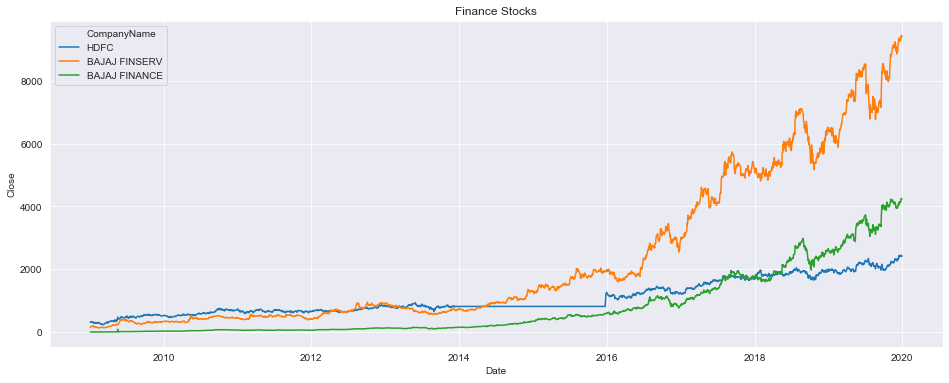

In [7]:
# this is for seaborn plots. 

import matplotlib.pyplot as plt
sns.set_style("darkgrid")
plt.figure(figsize=(16, 6))
bankplot=sns.lineplot(x='Date',y='Close',hue='CompanyName', data=df1 )
bankplot.set_title('Finance Stocks')
bankplot


In [8]:
#this is for plotly plots

df1.iplot(kind='line',x='Date',y='Close',categories='CompanyName',mode='lines')

In [9]:
yearlist=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
datelist=list(df1[df1['Date']=='2009-01-02']['Date'].unique())
returns=pd.DataFrame()
#returns=pd.
for i in yearlist:
    datelist.append(df1[df1['Date'].apply(lambda x:x.year)==i]['Date'].max())
    
for j in datelist:
    returns =pd.concat([returns,df1[df1['Date']==j][['CompanyName','Date','Adj Close']]])
returns.reset_index(inplace=True,drop=True)
returns.rename(columns={'Adj Close':'Price'},inplace=True)
companylist=returns['CompanyName'].unique()
returns_pct_change=pd.DataFrame()
returns.set_index(['CompanyName','Date'],inplace=True)
return_pct_change=pd.DataFrame()
for k in  companylist:
    return_pct_change = pd.concat([return_pct_change,returns.loc[k].pct_change()],axis=1)
    return_pct_change.rename(columns={'Price':k},inplace=True)
    
return_pct_change.to_excel('Finance_Returns.xlsx','Finance')


    



In [10]:
yearlist=[2019]
datelist=list(df1[df1['Date']=='2009-01-02']['Date'].unique())
returns=pd.DataFrame()
#returns=pd.
for i in yearlist:
    datelist.append(df1[df1['Date'].apply(lambda x:x.year)==i]['Date'].max())
    
for j in datelist:
    returns =pd.concat([returns,df1[df1['Date']==j][['CompanyName','Date','Adj Close']]])
returns.reset_index(inplace=True,drop=True)
returns.rename(columns={'Adj Close':'Price'},inplace=True)
companylist=returns['CompanyName'].unique()
returns_pct_change=pd.DataFrame()
returns.set_index(['CompanyName','Date'],inplace=True)
return_pct_change_absolute=pd.DataFrame()
for k in  companylist:
    return_pct_change_absolute = pd.concat([return_pct_change_absolute,returns.loc[k].pct_change()],axis=1)
    return_pct_change_absolute.rename(columns={'Price':k},inplace=True)
    

return_pct_change_absolute.to_excel('Finance_Returns_absolute.xlsx','Finance')


    

